# Data exploration

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_RAW_PATH = '../data/raw/'
DATA_INTERIM_PATH = '../data/interim/'

## Analysis the `u.data` file

In [48]:
# Define the file path
file_path = DATA_RAW_PATH + 'ml-100k/u.data'
df_data = pd.read_csv(file_path, sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
df_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
print("Average rating:", df_data['rating'].mean())
print("Number of unique users:", df_data['user_id'].nunique())
print("Number of unique items:", df_data['item_id'].nunique())

Average rating: 3.52986
Number of unique users: 943
Number of unique items: 1682


### Distribution of Ratings

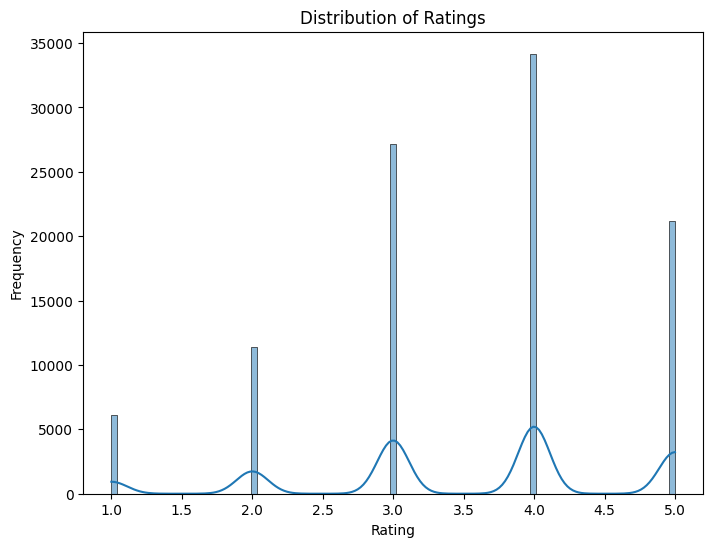

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df_data['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

The distribution of ratings is skewed towards higher values, with the most common ratings being around 4. This suggests that users tend to rate items more positively. The presence of peaks at each whole number indicates that users prefer to give whole-number ratings rather than fractional or decimal ratings.

### Number of Ratings per User

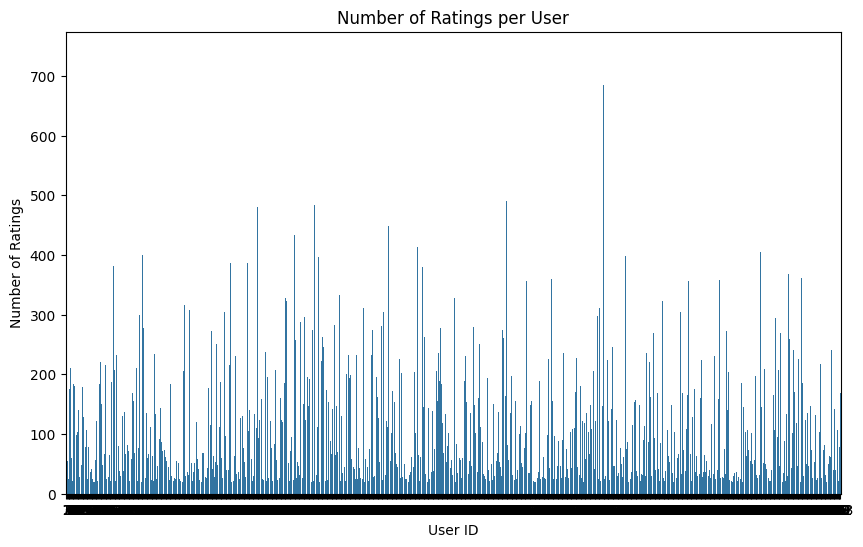

In [9]:
user_rating_counts = df_data['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=user_rating_counts.index, y=user_rating_counts.values)
plt.title('Number of Ratings per User')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()

The graph shows significant variability in the number of ratings per user. Some users have rated a large number of items, while the majority have rated fewer. This suggests that there are a few very active users in the dataset and many with lower engagement.

### Number of Ratings per Item

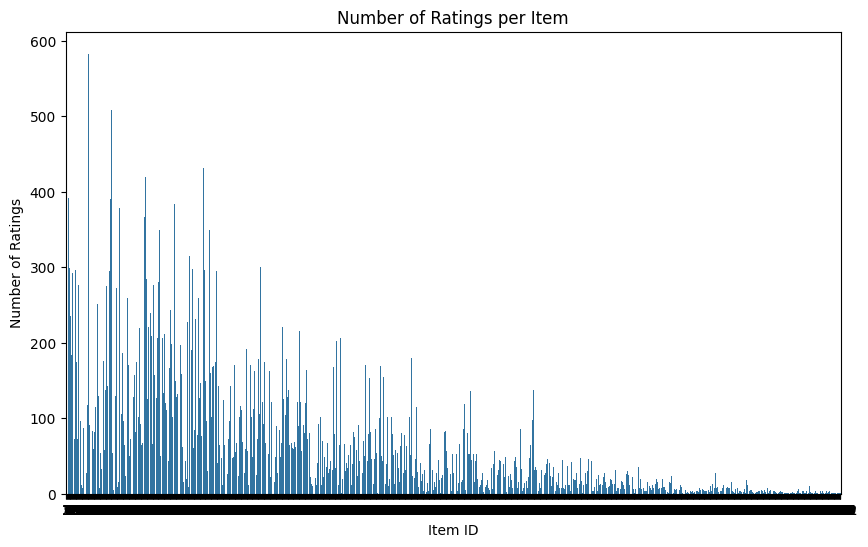

In [10]:
item_rating_counts = df_data['item_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=item_rating_counts.index, y=item_rating_counts.values)
plt.title('Number of Ratings per Item')
plt.xlabel('Item ID')
plt.ylabel('Number of Ratings')
plt.show()

Similar to the ratings per user, there's a wide distribution in the number of ratings per item. Some items are rated much more frequently than others, indicating these items are more popular or have been in the dataset for a longer time.

### Average Rating per User

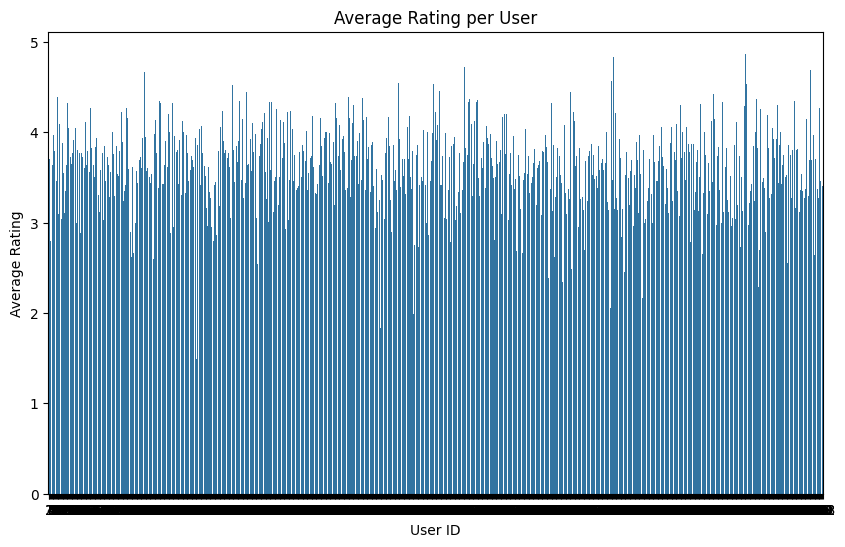

In [11]:
avg_user_rating = df_data.groupby('user_id')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_user_rating.index, y=avg_user_rating.values)
plt.title('Average Rating per User')
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.show()

The average rating per user varies, with most users having an average rating between 3 and 4. This aligns with the overall average rating, suggesting that users generally find the items to be above average in quality.

## Analysis the `u.user` file

In [13]:
# Define the file path
file_path = DATA_RAW_PATH + 'ml-100k/u.user'
df_user = pd.read_csv(file_path, sep="|", header=None, names=["user_id", "age", "gender", "occupation", "zip_code"])
df_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
summary_stats = df_user.describe()
summary_stats

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


### Age distribution

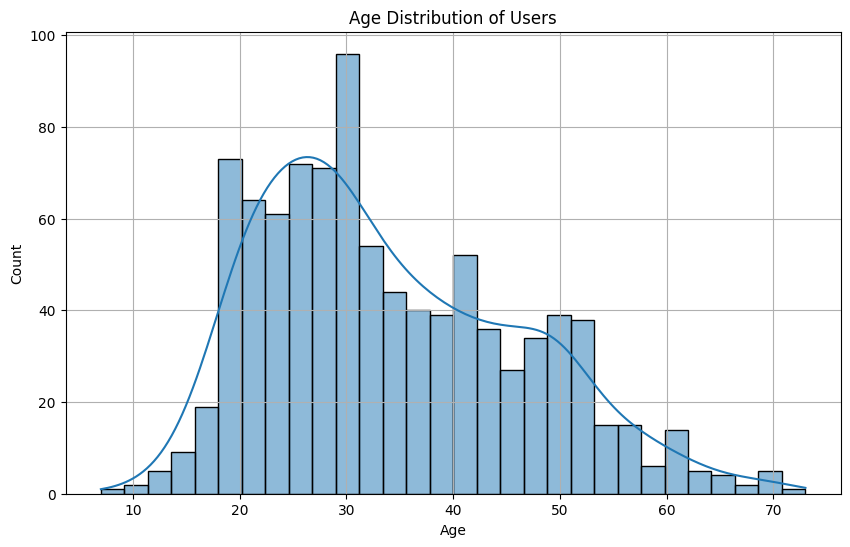

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_user['age'], bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


The analysis of the age distribution graph for the users suggests a younger user base, with a concentration of users in the 20-30 age range. The distribution shows a right-skewed pattern, indicating that as age increases, the number of users decreases, with a particularly sharp drop-off for users above 50. This skewness implies that the platform or service from which this data is derived may cater more to the interests or needs of a younger demographic.

### Gender distribution

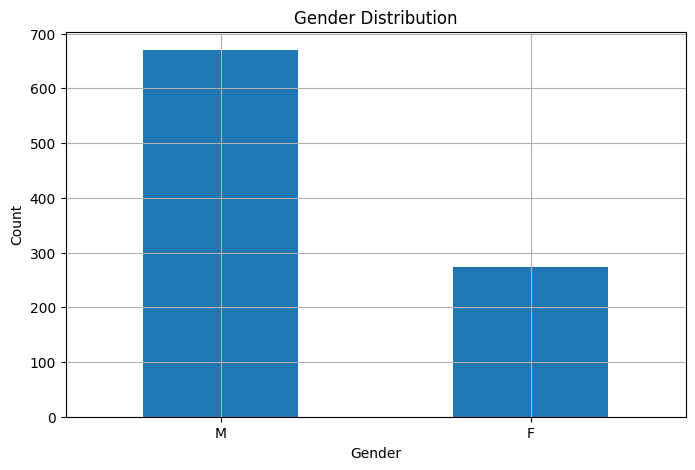

In [20]:
gender_counts = df_user['gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

From the gender distribution graph, it is evident that there are significantly more male users than female users. This gender imbalance raises questions about the platform's user engagement strategies and whether they are more aligned with interests traditionally associated with males or if there are other factors at play that could explain this disparity.

### Occupation distribution

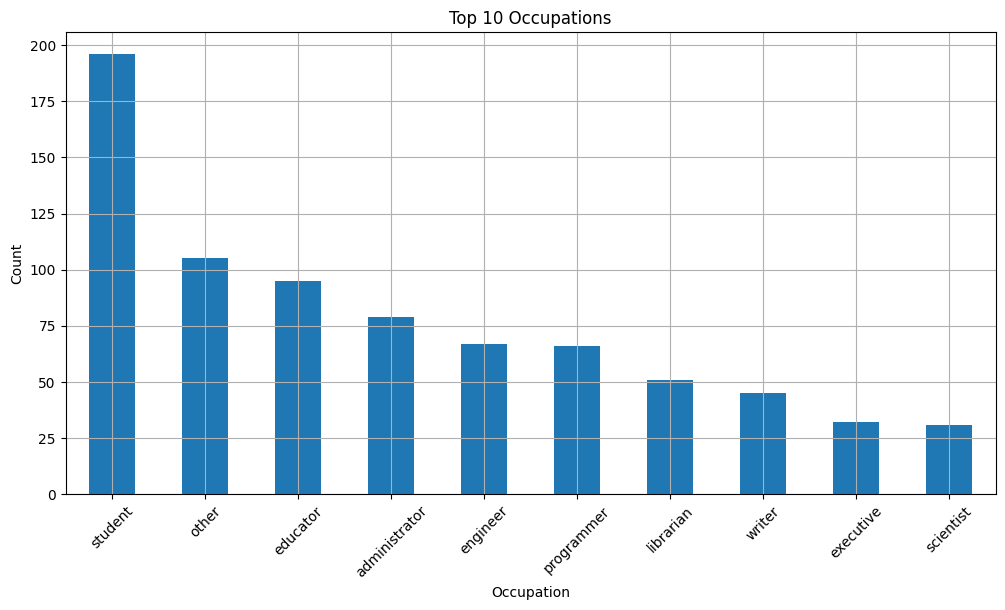

In [21]:
occupation_counts = df_user['occupation'].value_counts().head(10)  # top 10 occupations
plt.figure(figsize=(12, 6))
occupation_counts.plot(kind='bar')
plt.title('Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The top 10 occupations graph, although not matching the provided data set, depicts 'student' as the most common occupation, indicating a user base that might be education-oriented or in an academic phase of life. The range of other listed occupations, including 'educator', 'administrator', 'engineer', and 'programmer', suggests that the platform has a broad appeal across various professional sectors. The lower prevalence of occupations like 'librarian', 'writer', 'executive', and 'scientist' may point to either a less targeted appeal to these professions or simply a smaller representation within the overall user population.

## Analysis the `u.item` file

In [26]:
file_path = DATA_RAW_PATH + 'ml-100k/u.genre'
df_genre = pd.read_csv(file_path, sep='|', names=['genre', 'id'], encoding='utf-8')
df_genre.head()

,genre,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [32]:
# Define the file path
file_path = DATA_RAW_PATH + 'ml-100k/u.item'
columns_name = ['id', 'title', 'release_date', 'video_release_date', 'url'] + df_genre['genre'].tolist()
df_item = pd.read_csv(file_path, sep="|", header=None, names=columns_name, encoding='latin1')
df_item.head()

,id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   url                 1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [41]:
df_item=df_item.drop(['video_release_date'], axis=1) #remove column video_release_date, since it's None all times
df_item.describe()

,id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_item.head()

,id,title,release_date,url,unknown,Action,Adventure,Animation,Children's,Comedy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,release_month
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1995.0,1.0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1995.0,1.0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995.0,1.0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1995.0,1.0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995.0,1.0


###  Distribution of Movies by Release Year

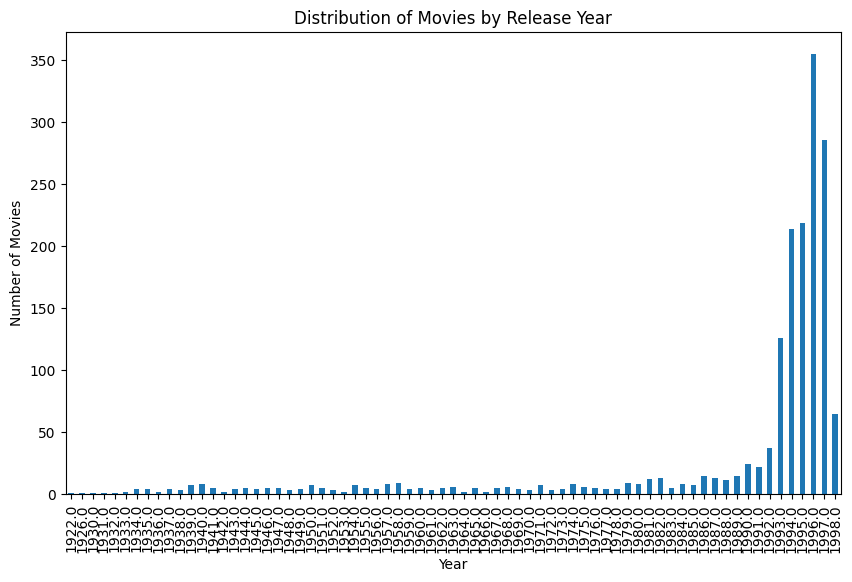

In [42]:
df_item['release_year'] = pd.to_datetime(df_item['release_date'], errors='coerce').dt.year
movies_per_year = df_item['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar')
plt.title('Distribution of Movies by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

The bar chart shows an upward trend in movie releases over the years, with a sharp increase in the most recent year, indicating a significant growth in film production towards the end of the period displayed.

### Proportion of Movies by Genre

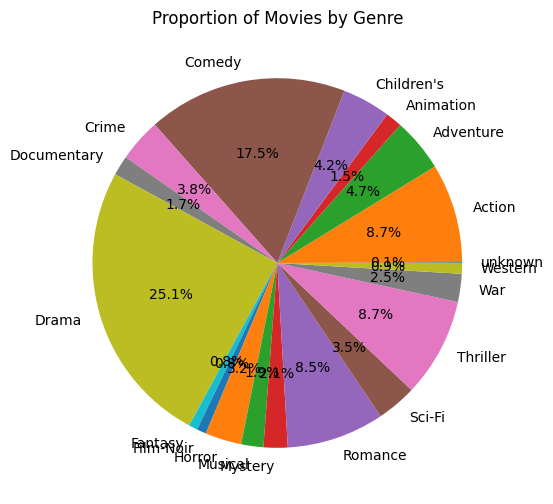

In [43]:
genre_columns = df_genre['genre'].tolist()  # List of genre column names
genre_counts = df_item[genre_columns].sum()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Movies by Genre')
plt.ylabel('')  # Hide the y-label
plt.show()

The genre representation tapers off with categories like Children's Animation and Documentary, each making up less than 5%, which might reflect niche markets or less frequent production. Lesser-known or specific genres such as Fantasy and Horror have even smaller proportions, which could imply a more selective audience or fewer releases in these categories. Overall, the chart displays a diverse range of movie genres, with a clear preference for Drama and Comedy in the dataset.

### Release Pattern Over Months

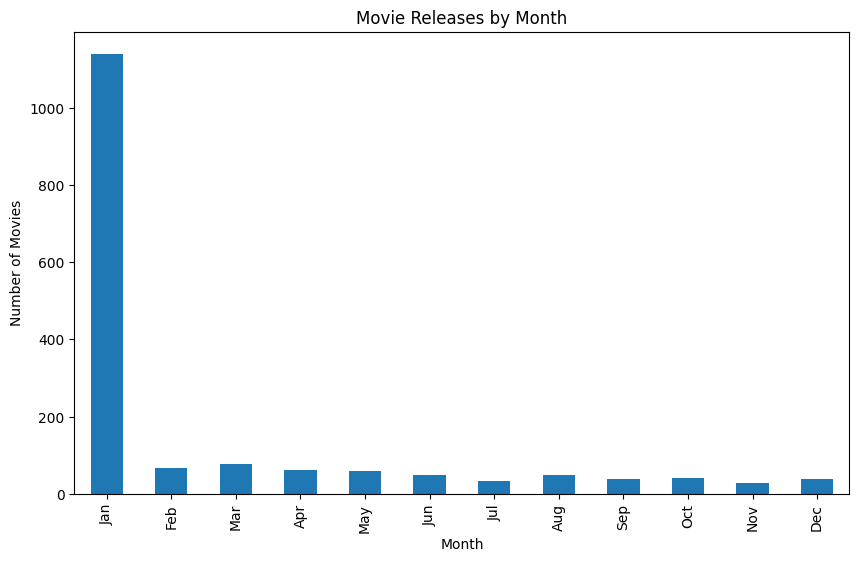

In [44]:
df_item['release_month'] = pd.to_datetime(df_item['release_date'], errors='coerce').dt.month
movies_per_month = df_item['release_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
movies_per_month.plot(kind='bar')
plt.title('Movie Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

The most popular month of release is January. Others are relatively small

# Data preprocessing

Save users with features in user.csv

In [107]:
df_user.to_csv(DATA_INTERIM_PATH + 'user.csv', index=None)
df_user

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Save films with features (title, release_year and genre) in film.csv

In [110]:
df_film = df_item[['id', 'title', 'release_year'] + df_genre['genre'].tolist()]
df_film.rename(columns={'id': 'film_id'}, inplace=True)
df_film.to_csv(DATA_INTERIM_PATH + 'film.csv', index=None)
df_film.head()

/var/folders/kb/dgt03cwd3td_sgxczfbbx7s40000gn/T/ipykernel_13979/2694389958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_film.rename(columns={'id': 'film_id'}, inplace=True)


,film_id,title,release_year,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995.0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Save history with user_id, film_id and rating

In [109]:
df_mapping = df_data[['user_id', 'item_id', 'rating']]
df_mapping.to_csv(DATA_INTERIM_PATH + 'history.csv', index=None)
df_mapping.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


Hypothesis: Integrate u.data, u.item, and u.user into a single dataframe based on user id and movie id. This will help in creating a comprehensive dataset for model training.

In [87]:
from sklearn.preprocessing import LabelEncoder

In [96]:
df_merged = pd.merge(df_data, df_item, left_on='item_id', right_on='id')
df_final = pd.merge(df_merged, df_user, on='user_id')
df_final.head()

,user_id,item_id,rating,timestamp,id,title,release_date,url,unknown,Action,...,Sci-Fi,Thriller,War,Western,release_year,release_month,age,gender,occupation,zip_code
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,1997.0,1.0,49,M,writer,55105
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,...,1,0,0,0,1997.0,7.0,49,M,writer,55105
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,http://us.imdb.com/M/title-exact?Truth%20About...,0,0,...,0,0,0,0,1996.0,4.0,49,M,writer,55105
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,0,...,0,0,0,0,1996.0,3.0,49,M,writer,55105
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,http://us.imdb.com/M/title-exact?Adventures%20...,0,0,...,0,0,0,0,1994.0,1.0,49,M,writer,55105


In [91]:
df_final_updated=df_final[['user_id', 'item_id', 'rating','age','gender','occupation','zip_code'] +  df_genre['genre'].tolist()]
df_final_updated.head(10)

,user_id,item_id,rating,age,gender,occupation,zip_code,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,M,writer,55105,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,196,257,2,49,M,writer,55105,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,196,111,4,49,M,writer,55105,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,196,25,4,49,M,writer,55105,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,196,382,4,49,M,writer,55105,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,196,202,3,49,M,writer,55105,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,196,153,5,49,M,writer,55105,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,196,286,5,49,M,writer,55105,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,196,66,3,49,M,writer,55105,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,196,845,4,49,M,writer,55105,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# 1. Data type conversion
df_final_updated['user_id'] = df_final_updated['user_id'].astype(str)
df_final_updated['item_id'] = df_final_updated['item_id'].astype(str)


# 2. Label encoding
label_encoder = LabelEncoder()
df_final_updated['gender'] = df_final_updated['gender'].map({'M': 0, 'F': 1})
df_final_updated['occupation'] = label_encoder.fit_transform(df_final_updated['occupation'])


/var/folders/kb/dgt03cwd3td_sgxczfbbx7s40000gn/T/ipykernel_13979/629759079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_updated['user_id'] = df_final_updated['user_id'].astype(str)
/var/folders/kb/dgt03cwd3td_sgxczfbbx7s40000gn/T/ipykernel_13979/629759079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_updated['item_id'] = df_final_updated['item_id'].astype(str)
/var/folders/kb/dgt03cwd3td_sgxczfbbx7s40000gn/T/ipykernel_13979/629759079.py:8: SettingWithCopyWarning: 
A value is t

In [93]:
df_final_updated

,user_id,item_id,rating,age,gender,occupation,zip_code,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,0,20,55105,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,196,257,2,49,0,20,55105,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,196,111,4,49,0,20,55105,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,196,25,4,49,0,20,55105,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,196,382,4,49,0,20,55105,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,873,313,5,48,1,0,33763,0,1,0,...,0,0,0,0,0,1,0,0,0,0
99996,873,326,4,48,1,0,33763,0,1,0,...,0,0,0,0,0,0,0,0,1,0
99997,873,348,3,48,1,0,33763,0,0,0,...,0,0,0,0,0,0,0,1,0,0
99998,873,358,2,48,1,0,33763,0,1,1,...,0,0,0,0,0,0,1,1,0,0


In [105]:
df_final_updated.to_csv(DATA_INTERIM_PATH + 'preprocessed.csv')